In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.stats.multicomp as multi

#from sklearn.linear_model import LinearRegression
#from sklearn import metrics
df = pd.read_excel("../Data/4. База данных, Хакатон в РЭШ, 16-17 марта.xlsx")


In [32]:
#подготовка данных и привод всех их в числы
df["a6a"] = df["a6a"].replace("Малый",0)
df["a6a"] = df["a6a"].replace("Средний",1)
df["a6a"] = df["a6a"].replace("Крупный",2)
df["a6a"] = df["a6a"].fillna(0)
df["n2b"] = df["n2b"].replace("Не знаю",100)
df["n2b"] = df["n2b"].fillna(0)
df["n2b"] = df["n2b"].astype("int64")
df["BMGe1"] = df["BMGe1"].replace("Не знаю",0)
df["BMGe1"] = df["BMGe1"].astype("int64")



C:\Users\Админ\AppData\Local\Temp\ipykernel_5056\3455179482.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["a6a"] = df["a6a"].replace("Крупный",2)


<Figure size 1000x800 with 0 Axes>

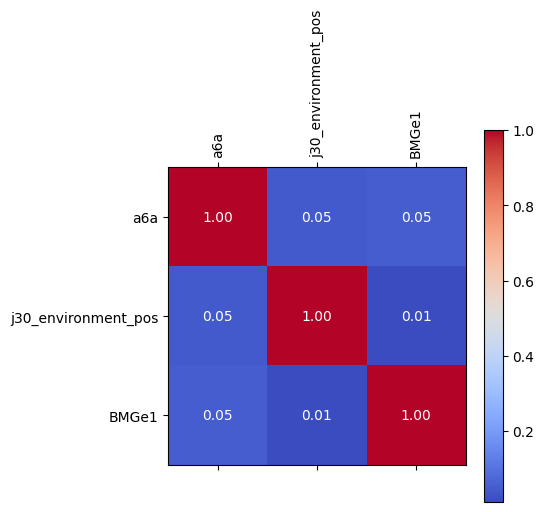

In [7]:
#матрица корреляции
data_to_corr = pd.DataFrame({"a6a":df["a6a"],
                             "j30_environment_pos":df["j30_environment_pos"],
                             "BMGe1":df["BMGe1"]}) #ту просто можно добавить элементов и будет 5 на 5 или больше
corr_matrix = data_to_corr.corr()
plt.figure(figsize=(10, 8))
plt.matshow(corr_matrix, cmap="coolwarm")
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns , rotation="vertical")
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.colorbar()
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        plt.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}", ha="center", va="center", color="w")
 
plt.show()


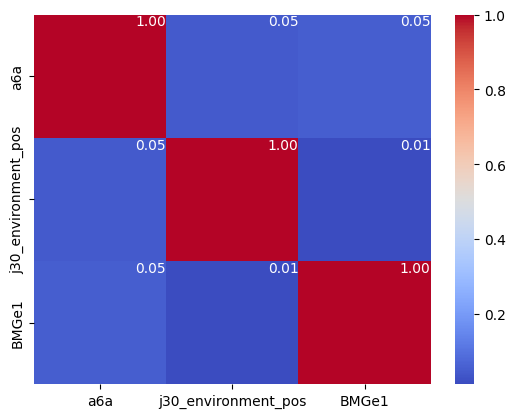

In [8]:
#второй вариант матрицы корреляции, мне больше нравится первый
sns.heatmap(corr_matrix,cmap="coolwarm")
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        plt.text(j+1, i, f"{corr_matrix.iloc[i, j]:.2f}", ha="right", va="top", color="w")
 

In [9]:
#модель линейной регрессии 
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
X = df["a6a"]
Y = df["j30_environment_pos"]
X = sm.add_constant(X,prepend=False)
model = OLS(Y,X)
res = model.fit()
print(res.summary())

                             OLS Regression Results                            
Dep. Variable:     j30_environment_pos   R-squared:                       0.002
Model:                             OLS   Adj. R-squared:                  0.001
Method:                  Least Squares   F-statistic:                     2.722
Date:                 Fri, 20 Sep 2024   Prob (F-statistic):             0.0992
Time:                         12:07:40   Log-Likelihood:                -3180.3
No. Observations:                 1323   AIC:                             6365.
Df Residuals:                     1321   BIC:                             6375.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
a6a            0.1464      0.089      1.65

In [34]:
#переписал модель на склеарн, работает многократно лучше, НО тут нет встроенного p-value, что не есть хорошо
"""x = np.array(df["a6a"])
X = np.array(df["a6a"]).reshape((-1,1))
Y = np.array(df["j30_environment_pos"])

model = LinearRegression()
model.fit(X,Y)

#библиотека stats идет нафик
slope, intercept, r_value, p_value, std_err = stats.linregress(x,Y)
print(p_value,'    ',r_value)
print(model.score(X,Y))
#для p-value и прочей статистики """

0.09921481365818101      0.04534627588676468
0.0020562847367986414


C:\Users\Админ\AppData\Local\Temp\ipykernel_5056\4014633365.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["a6a"],y=df["j30_environment_pos"],palette='hls')


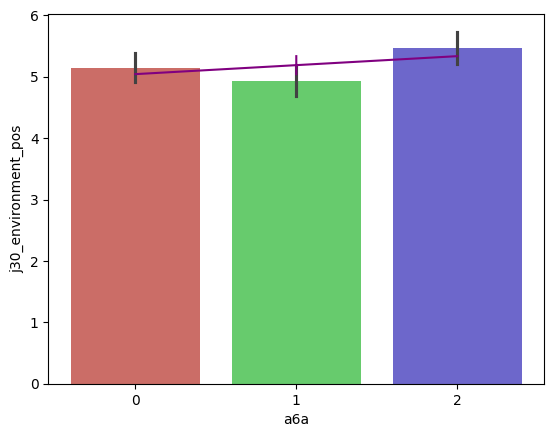

In [10]:
sns.barplot(x=df["a6a"],y=df["j30_environment_pos"],palette='hls')
#plt.plot(X,model.predict(X),color="orange")
X = df["a6a"]
Y = df["j30_environment_pos"]
X = sm.add_constant(X,prepend=False)
model = OLS(Y,X)
res = model.fit()
plt.plot(X,res.predict(X),color="purple")


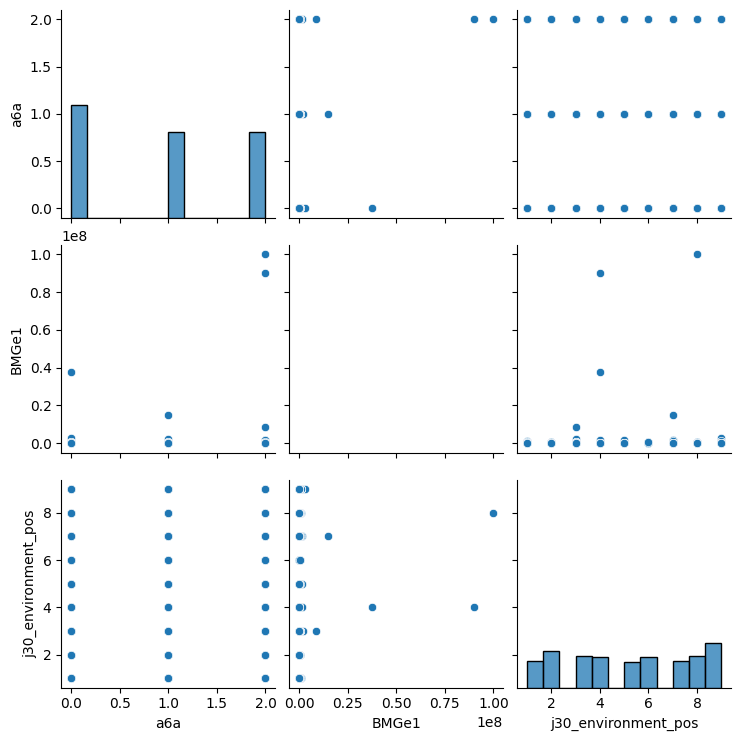

In [44]:
#прикольная шутка для визуализации, ЧЕРНОВЫХ, что самое галвное, потому что в презу такое кидать вообще кринж 
pair_data = pd.DataFrame({"a6a": df["a6a"],
                          "BMGe1": df["BMGe1"],
                          "BMGe2": df["BMGe2"],
                          "j30_environment_pos": df["j30_environment_pos"]})
sns.pairplot(pair_data)

Chi2ContingencyResult(statistic=np.float64(1250.0028406914075), pvalue=np.float64(0.921233092177893), dof=1322, expected_freq=array([[0.59656972, 3.40343028],
       [0.74571216, 4.25428784],
       [0.29828486, 1.70171514],
       ...,
       [1.04399702, 5.95600298],
       [0.44742729, 2.55257271],
       [1.34228188, 7.65771812]]))


<Axes: >

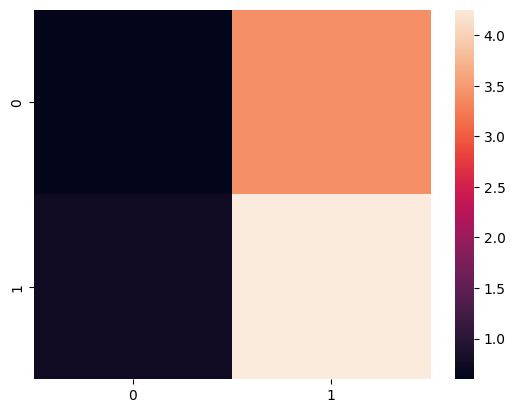

In [26]:
#хи-квадрат 
import scipy
pair_data = pd.DataFrame({"a6a": df["a6a"],
                          "j30_environment_pos": df["j30_environment_pos"]})


chi2 = scipy.stats.chi2_contingency(pair_data)

print(chi2)
sns.heatmap(chi2[3][:2])

In [33]:
#этот тест показывает, что мы не можем отвергнуть гипотезу и это о том, что говорит о том, что между ними есть связь
multi_comparison = multi.MultiComparison(df["a6a"],df["j30_environment_pos"]) 
results = multi_comparison.tukeyhsd() 
print(results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.0971 0.9868 -0.2078 0.4021  False
     1      3   0.1986 0.5729 -0.1165 0.5137  False
     1      4   0.1281 0.9427  -0.188 0.4442  False
     1      5   0.1733  0.787 -0.1566 0.5033  False
     1      6   0.1907 0.6339 -0.1259 0.5073  False
     1      7    0.175 0.7721 -0.1529 0.5029  False
     1      8   0.1657 0.7818 -0.1479 0.4793  False
     1      9   0.1778 0.6192 -0.1141 0.4697  False
     2      3   0.1015 0.9774 -0.1912 0.3941  False
     2      4    0.031    1.0 -0.2628 0.3247  False
     2      5   0.0762 0.9977 -0.2324 0.3848  False
     2      6   0.0936  0.987 -0.2007 0.3879  False
     2      7   0.0778 0.9972 -0.2286 0.3842  False
     2      8   0.0685 0.9983 -0.2225 0.3596  False
     2      9   0.0807 0.9908 -0.1869 0.3482  False
     3      4  -0.0705 0.9985 -0.3748 0.2338  False
     3      

In [42]:
#корреляиция Спирмана совпала с матрицей корреляций и результатами нейросети
print(stats.pearsonr(df["a6a"],df["j30_environment_pos"]))


PearsonRResult(statistic=np.float64(0.045346275886764695), pvalue=np.float64(0.09921481365818191))
TtestResult(statistic=np.float64(-56.02206144813456), pvalue=np.float64(0.0), df=np.int64(1322))
